In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from sklearn.metrics import r2_score
from scipy.spatial import distance
from skbio.stats.ordination import pcoa
%run -i '../../utils.py'

# Get data

In [8]:
# read meta data
df_meta = pd.read_excel('../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin'] # inulin only
df_meta.head()

,MiceID,Vendor,Day,Diet,RandomizedGroup
SampleID,,,,,
sample141,BI1,Beijing,0,Inulin,A
sample142,BI2,Beijing,0,Inulin,B
sample143,BI3,Beijing,0,Inulin,D
sample144,BI4,Beijing,0,Inulin,E
sample145,BI5,Beijing,0,Inulin,C


In [9]:
# read SCFA data
df_scfa = pd.read_excel('../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [10]:
df_join = pd.merge(df_meta, df_scfa, left_index=True, right_index=True, how='inner')
df_join.head()

,MiceID,Vendor,Day,Diet,RandomizedGroup,Acetate,Propionate,Butyrate
SampleID,,,,,,,,
sample141,BI1,Beijing,0,Inulin,A,5.233899,1.930933,1.109582
sample142,BI2,Beijing,0,Inulin,B,13.459823,3.621771,1.546647
sample143,BI3,Beijing,0,Inulin,D,18.075378,2.859916,1.682656
sample144,BI4,Beijing,0,Inulin,E,12.580368,3.148773,1.477688
sample145,BI5,Beijing,0,Inulin,C,8.065127,3.134209,1.835172


# Show individual SCFA

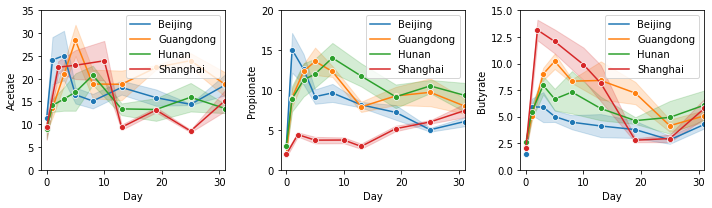

In [21]:
fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=3)

for k,scfa in enumerate(['Acetate','Propionate','Butyrate']):
    _ = sns.lineplot(data=df_join, x='Day', y=scfa, ci=68, hue='Vendor', marker='o', ax=ax[k])
    ax[k].set_ylabel(scfa)
    ax[k].set_xlabel('Day')
    ax[k].legend()
    ax[k].set_xlim([-1,31])
    if scfa=='Acetate':
        ax[k].set_ylim([0,35])
    if scfa=='Propionate':
        ax[k].set_ylim([0,20])
    if scfa=='Butyrate':
        ax[k].set_ylim([0,15])
plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("individual_scfa.svg", format="svg")